In [1]:
import scanpy as sc
import scFates as scf
import numpy as np
import matplotlib.pyplot as plt
import deseq2py as deseq2
adata_bulk=sc.read("adata_bulk_deseq2.h5ad")
scf.set_figure_pubready()
import scvelo as scv
scv.set_figure_params(figsize=(4,4))
adata=sc.read("../SS2/data/adata_assigned.h5ad")

In [2]:
df=adata_bulk.uns['condition_S100GFP._vs_NG2DsRed..S100GFP.']['LFC_shrink']

In [3]:
df=df.loc[df.padj<0.05]

In [4]:
sc.tl.rank_genes_groups(adata,"leiden",groups=["15"],reference="13")

In [5]:
df_sc=sc.get.rank_genes_groups_df(adata,"15",pval_cutoff=0.05).set_index("names")

(-60.41728595260548, 88.95850630227174)

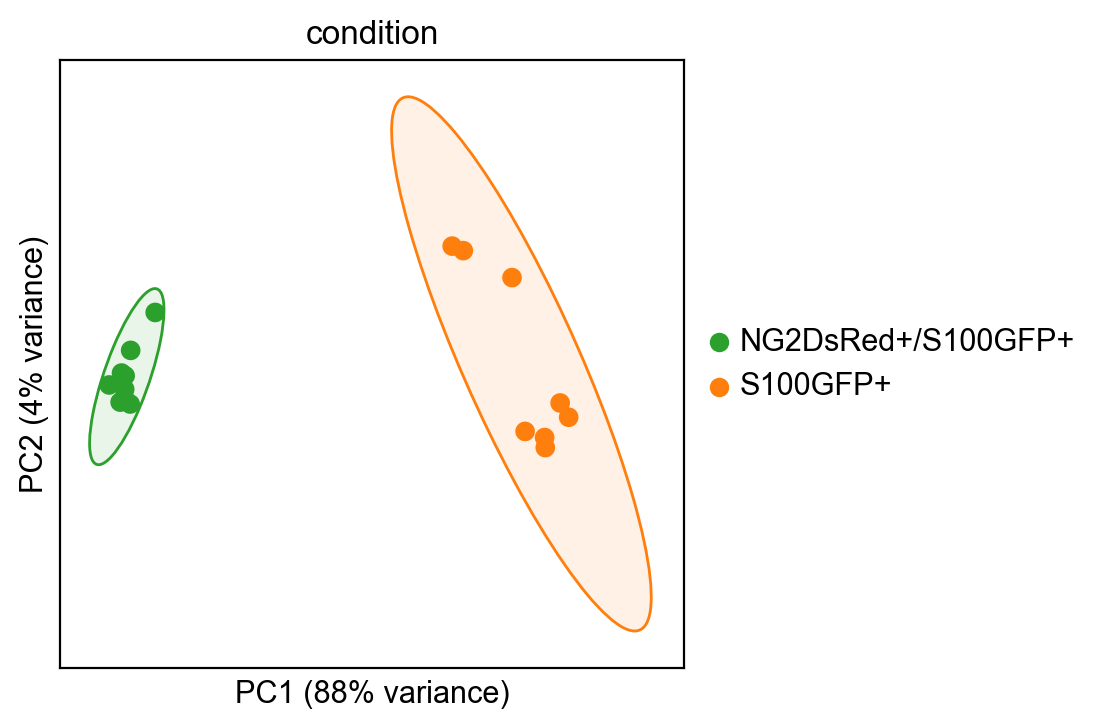

In [6]:
df_sc=sc.get.rank_genes_groups_df(adata,"15").set_index("names")
df_sc=sc.get.rank_genes_groups_df(adata,"15",pval_cutoff=0.05).set_index("names")
ax=deseq2.pl.pca(adata_bulk,color="condition",show_ellipses=True,show=False,palette=["tab:green","tab:orange"])
ax.get_xlim()

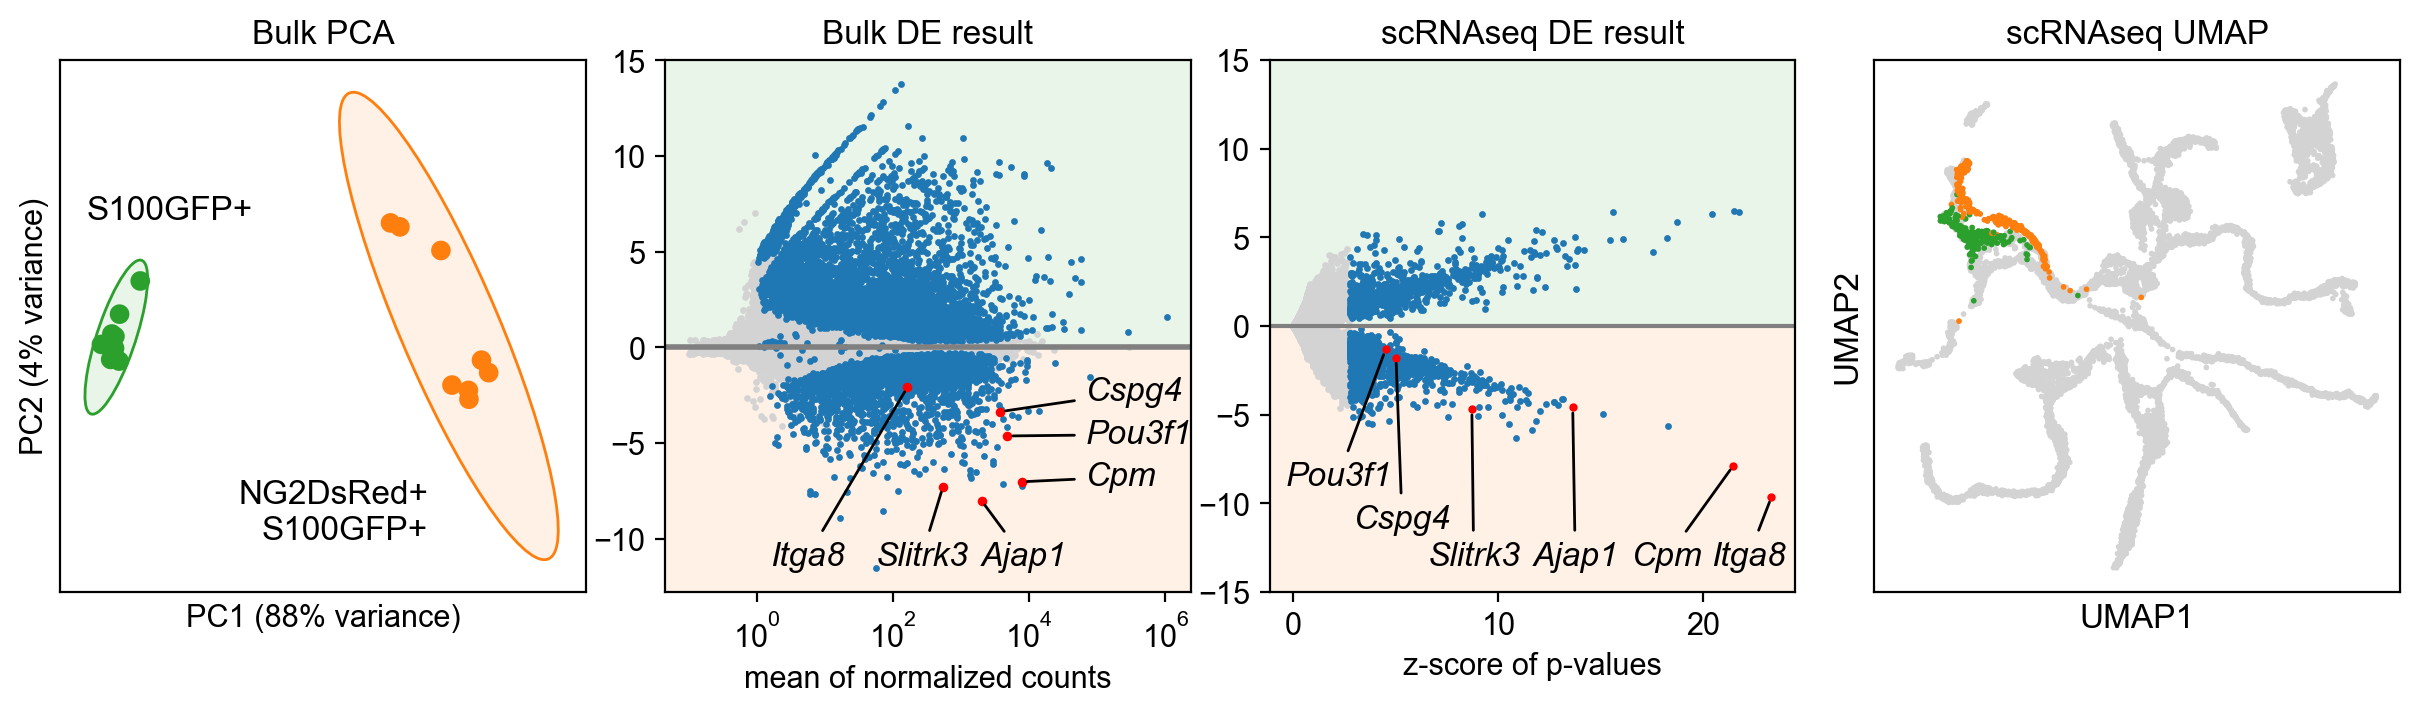

In [7]:
fig, axs = plt.subplots(1,4,figsize=(15,3.5),gridspec_kw=dict(wspace=.15))
deseq2.pl.pca(adata_bulk,ax=axs[0],show=False,color="condition",show_ellipses=True,legend_loc="none")
deseq2.pl.result(adata_bulk,"LFC_shrink","condition_S100GFP._vs_NG2DsRed..S100GFP.",ax=axs[1],show=False)

genes=["Itga8","Pou3f1","Cpm","Ajap1","Slitrk3","Cspg4"]
axs[1].scatter(df.loc[genes,"baseMean"],
            df.loc[genes,"log2FoldChange"],s=6,c="red");


axs[1].set_ylabel("")
axs[1].annotate("Itga8",(df.loc["Itga8","baseMean"],
            df.loc["Itga8","log2FoldChange"]),
            xytext=(0.2, 0.05), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[1].annotate("Cpm",(df.loc["Cpm","baseMean"],
            df.loc["Cpm","log2FoldChange"]),
            xytext=(0.8, 0.2), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[1].annotate("Pou3f1",(df.loc["Pou3f1","baseMean"],
            df.loc["Pou3f1","log2FoldChange"]),
            xytext=(0.8, 0.28), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[1].annotate("Cspg4",(df.loc["Cspg4","baseMean"],
            df.loc["Cspg4","log2FoldChange"]),
            xytext=(0.8, 0.36), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[1].annotate("Ajap1",(df.loc["Ajap1","baseMean"],
            df.loc["Ajap1","log2FoldChange"]),
            xytext=(0.6, 0.05), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));
axs[1].annotate("Slitrk3",(df.loc["Slitrk3","baseMean"],
            df.loc["Slitrk3","log2FoldChange"]),
            xytext=(0.4, 0.05), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));


df_sc=sc.get.rank_genes_groups_df(adata,"15").set_index("names")
axs[2].scatter(df_sc.scores.abs(),df_sc.logfoldchanges,c="lightgrey",s=2)
df_sc=sc.get.rank_genes_groups_df(adata,"15",pval_cutoff=0.05).set_index("names")
axs[2].scatter(df_sc.scores.abs(),df_sc.logfoldchanges,c="tab:blue",s=2,rasterized=True)
axs[2].scatter(df_sc.loc[genes,"scores"].abs(),
               df_sc.loc[genes,"logfoldchanges"],
               rasterized=True,s=4,c="red");
axs[2].set_ylim([-15,15])
axs[2].grid(False)
axs[2].axhline(0,c="grey")

axs[2].annotate("Itga8",(np.abs(df_sc.loc["Itga8","scores"]),df_sc.loc["Itga8","logfoldchanges"]),
            xytext=(0.84, 0.05), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[2].annotate("Cpm",(np.abs(df_sc.loc["Cpm","scores"]),df_sc.loc["Cpm","logfoldchanges"]),
            xytext=(0.69, 0.05), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[2].annotate("Pou3f1",(np.abs(df_sc.loc["Pou3f1","scores"]),df_sc.loc["Pou3f1","logfoldchanges"]),
            xytext=(0.03, 0.2), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[2].annotate("Cspg4",(np.abs(df_sc.loc["Cspg4","scores"]),df_sc.loc["Cspg4","logfoldchanges"]),
            xytext=(0.16, 0.12), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[2].annotate("Ajap1",(np.abs(df_sc.loc["Ajap1","scores"]),df_sc.loc["Ajap1","logfoldchanges"]),
            xytext=(0.5, 0.05), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[2].annotate("Slitrk3",(np.abs(df_sc.loc["Slitrk3","scores"]),df_sc.loc["Slitrk3","logfoldchanges"]),
            xytext=(0.3, 0.05), textcoords='axes fraction',fontstyle="italic",
            arrowprops=dict(facecolor='black',arrowstyle="-"));

axs[2].set_xlabel("z-score of p-values")

scv.pl.umap(adata,color="leiden",legend_loc="none",groups=["13","15"],
            palette=["tab:green","tab:orange","k"],title="",ax=axs[3],show=False,frameon=True)

axs[0].set_title("Bulk PCA")
axs[1].set_title("Bulk DE result")

axs[2].set_title("scRNAseq DE result")
axs[3].set_title("scRNAseq UMAP")

axs[0].set_xlim(ax.get_xlim())
axs[0].set_ylim(ax.get_ylim())
plt.tight_layout()

axs[0].annotate('NG2DsRed+\nS100GFP+',(.7,.1),xycoords="axes fraction",ha="right")

axs[0].annotate('S100GFP+',(.05,.7),xycoords="axes fraction")

ylims=axs[1].get_ylim()
axs[1].axhspan(0, 25, facecolor='tab:green', alpha=0.1,zorder=-100)
axs[1].axhspan(0, -25, facecolor='tab:orange', alpha=0.1,zorder=-100)
axs[1].set_ylim(ylims)

ylims=axs[2].get_ylim()
axs[2].axhspan(0, 25, facecolor='tab:green', alpha=0.1,zorder=-100)
axs[2].axhspan(0, -25, facecolor='tab:orange', alpha=0.1,zorder=-100)
axs[2].set_ylim(ylims)

plt.savefig("figures/suppNMJ_a.pdf",dpi=300)

In [8]:
adata.obs.leiden=adata.obs.leiden.astype(str).replace(["13","15"],["tSC","SC"]).astype("category")

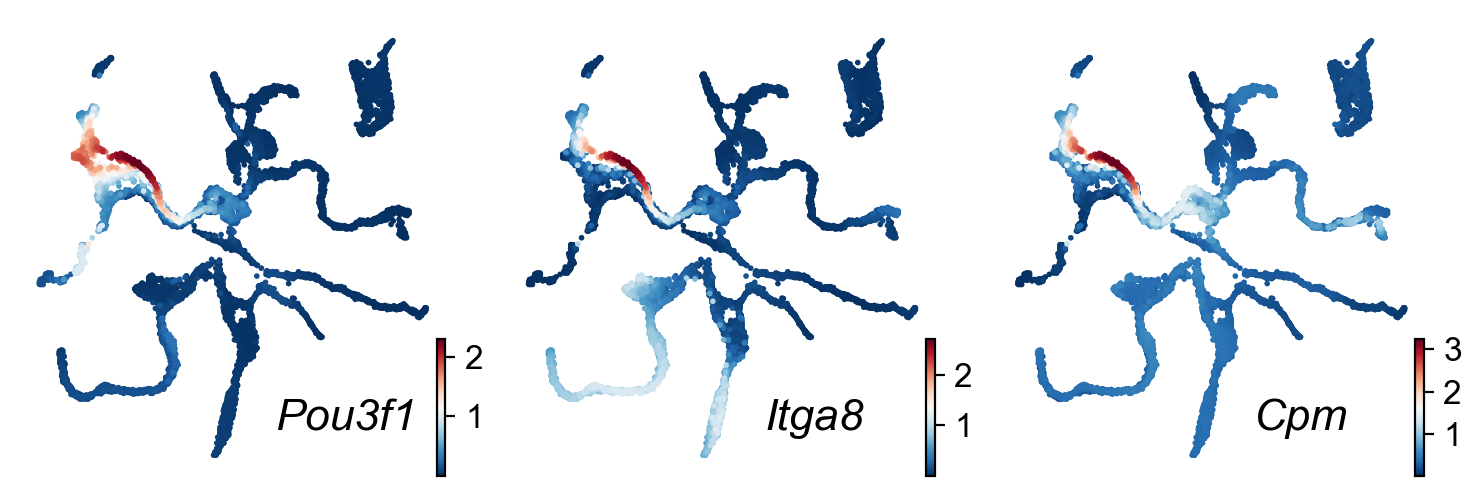

In [24]:
fig, axs = plt.subplots(1,3,figsize=(9,3),gridspec_kw=dict(wspace=.15))

ax1,ax2,ax3=axs.ravel()

scv.pl.umap(adata,color=["Pou3f1"],layer="palantir_imp",dpi=300,
            title="",cmap="RdBu_r",show=False,ax=ax1)
ax1.annotate("Pou3f1",(.6,.1),xycoords="axes fraction",style="italic",size=16)
scv.pl.umap(adata,color=["Itga8"],layer="palantir_imp",dpi=300,
            title="",cmap="RdBu_r",show=False,ax=ax2)
ax2.annotate("Itga8",(.6,.1),xycoords="axes fraction",style="italic",size=16)

scv.pl.umap(adata,color=["Cpm"],layer="palantir_imp",dpi=300,
            title="",cmap="RdBu_r",show=False,ax=ax3)
ax3.annotate("Cpm",(.6,.1),xycoords="axes fraction",style="italic",size=16)


plt.savefig("figures/suppNMJ_b.pdf",dpi=300,bbox_inches="tight")

In [10]:
adata_bulk.obs["exp"]=adata_bulk.obs.condition.astype(str)+np.arange(adata_bulk.shape[0]).astype(str)

In [11]:
adata_bulk.layers["scaled"]=sc.pp.scale(adata_bulk.layers["normalized"],copy=True)

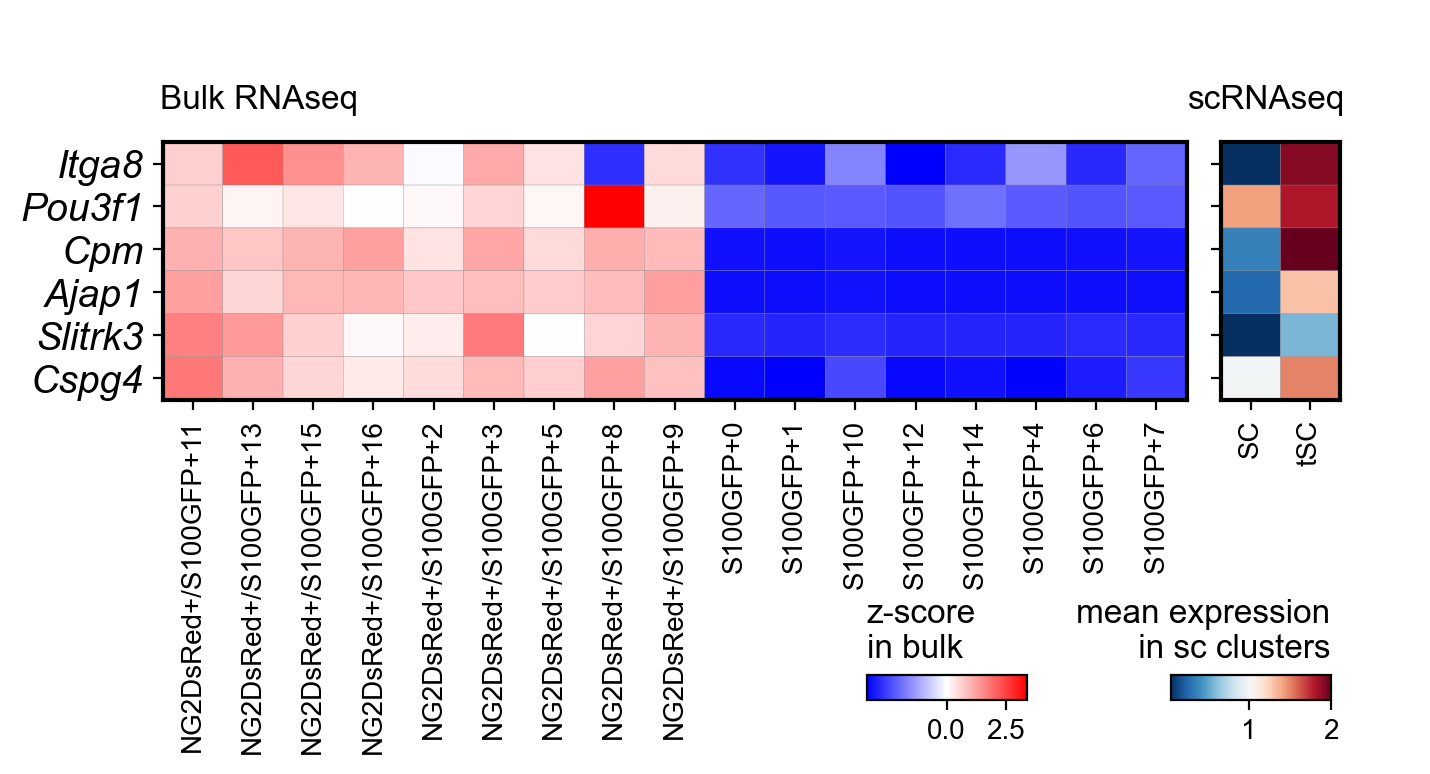

In [35]:
fig, axs=plt.subplots(1,2,figsize=(8,2.5),gridspec_kw=dict(width_ratios=[5,1]))
axx=sc.pl.matrixplot(adata_bulk,genes,"exp",layer="scaled",cmap="bwr",vcenter=0,colorbar_title="",swap_axes=True,show=False,ax=axs[0])
axx['color_legend_ax'].set_position([.62,-.45,.1,.05])
axx['color_legend_ax'].set_title("z-score\nin bulk",loc="left",size=12)
plt.setp(axx['mainplot_ax'].get_yticklabels(),fontsize=14, rotation=0, ha="right", rotation_mode="anchor",style="italic");

main = axx["mainplot_ax"].get_position().bounds
leg=axx["color_legend_ax"].get_position().bounds
tot_width=leg[0]+leg[2]
toadd=tot_width
axx["mainplot_ax"].set_position([main[0],main[1],.64,main[3]])

axx=sc.pl.matrixplot(adata[adata.obs.leiden.isin(["tSC","SC"])],genes,"leiden",colorbar_title="",swap_axes=True,cmap="RdBu_r",vmax=2,show=False,ax=axs[1])
axx['color_legend_ax'].set_position([.81,-.45,.1,.05])
axx['color_legend_ax'].set_title("mean expression\n in sc clusters",loc="right",size=12)
main = axx["mainplot_ax"].get_position().bounds
leg=axx["color_legend_ax"].get_position().bounds
tot_width=leg[0]+leg[2]
toadd=tot_width
axx["mainplot_ax"].set_position([main[0],main[1],main[2]+leg[2]-0.06,main[3]])
axx["mainplot_ax"].set_yticklabels("")


fig.text(0.24, .75, 'Bulk RNAseq', ha='center', va='center',size=12)
fig.text(0.87, .75, 'scRNAseq', ha='center', va='center',size=12)

plt.savefig("figures/suppNMJ_c.pdf",dpi=300,bbox_inches="tight")

In [13]:
import subprocess
files=["figures/suppNMJ_b.pdf","figures/suppNMJ_c.pdf"]


def get_ratio(file):
    command=('identify %s'%file).split()
    arr=np.array(subprocess.check_output(command).decode("utf-8").split(" ")[2].split("x"),dtype=int)
    return arr[0]/arr[1]

ratios=np.array([get_ratio(file) for file in files])
sum_ratios=ratios.sum()

In [14]:
ratios[0]=ratios[0]*2

In [15]:
sum_ratios=ratios.sum()
a,b=(ratios/sum_ratios)-0.01

In [16]:
a=a-0.07
b=b+0.07

In [17]:
fname="figEV4"

In [36]:
%%bash -s $fname $a $b
cat<<EOF >$1.tex
\documentclass[11pt]{article}
\usepackage[paperheight=200mm,paperwidth=210mm]{geometry}
 \geometry{
 left=5mm,
 right=5mm,
 top=5mm,
 bottom=5mm,
 }

\usepackage[labelfont=bf]{caption}
\usepackage{multirow}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\begin{document}
\setmainfont{Arial}

\definecolor{Blue}{RGB}{50, 49, 145}

\noindent
\scriptsize 


\raggedright \textbf{A} \textcolor{Blue}{NMJ glia DE analysis (results from voth bulk and scRNAseq) from Castro R \textit{et al.}}
\includegraphics[width=1\textwidth]{figures/suppNMJ_a.pdf}

\begin{minipage}[t]{.55\textwidth}
\raggedright \textbf{B} \textcolor{Blue}{NMJ Schwann cell gene markers in the scRNAseq data set}
\includegraphics[width=1\textwidth]{figures/suppNMJ_b.pdf}
\end{minipage}\hfill
\begin{minipage}[t]{.45\textwidth}
\raggedright \textbf{C} \textcolor{Blue}{NMJ marker gene expression in bulk and scRNAseq data sets}
\includegraphics[trim=0 0 .4in .2in, clip,width=1\textwidth]{figures/suppNMJ_c.pdf}
\end{minipage}\hfill

\hfill
\clearpage


EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg
identify $1.pdf

This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./figEV5.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/multirow/multirow.sty)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist

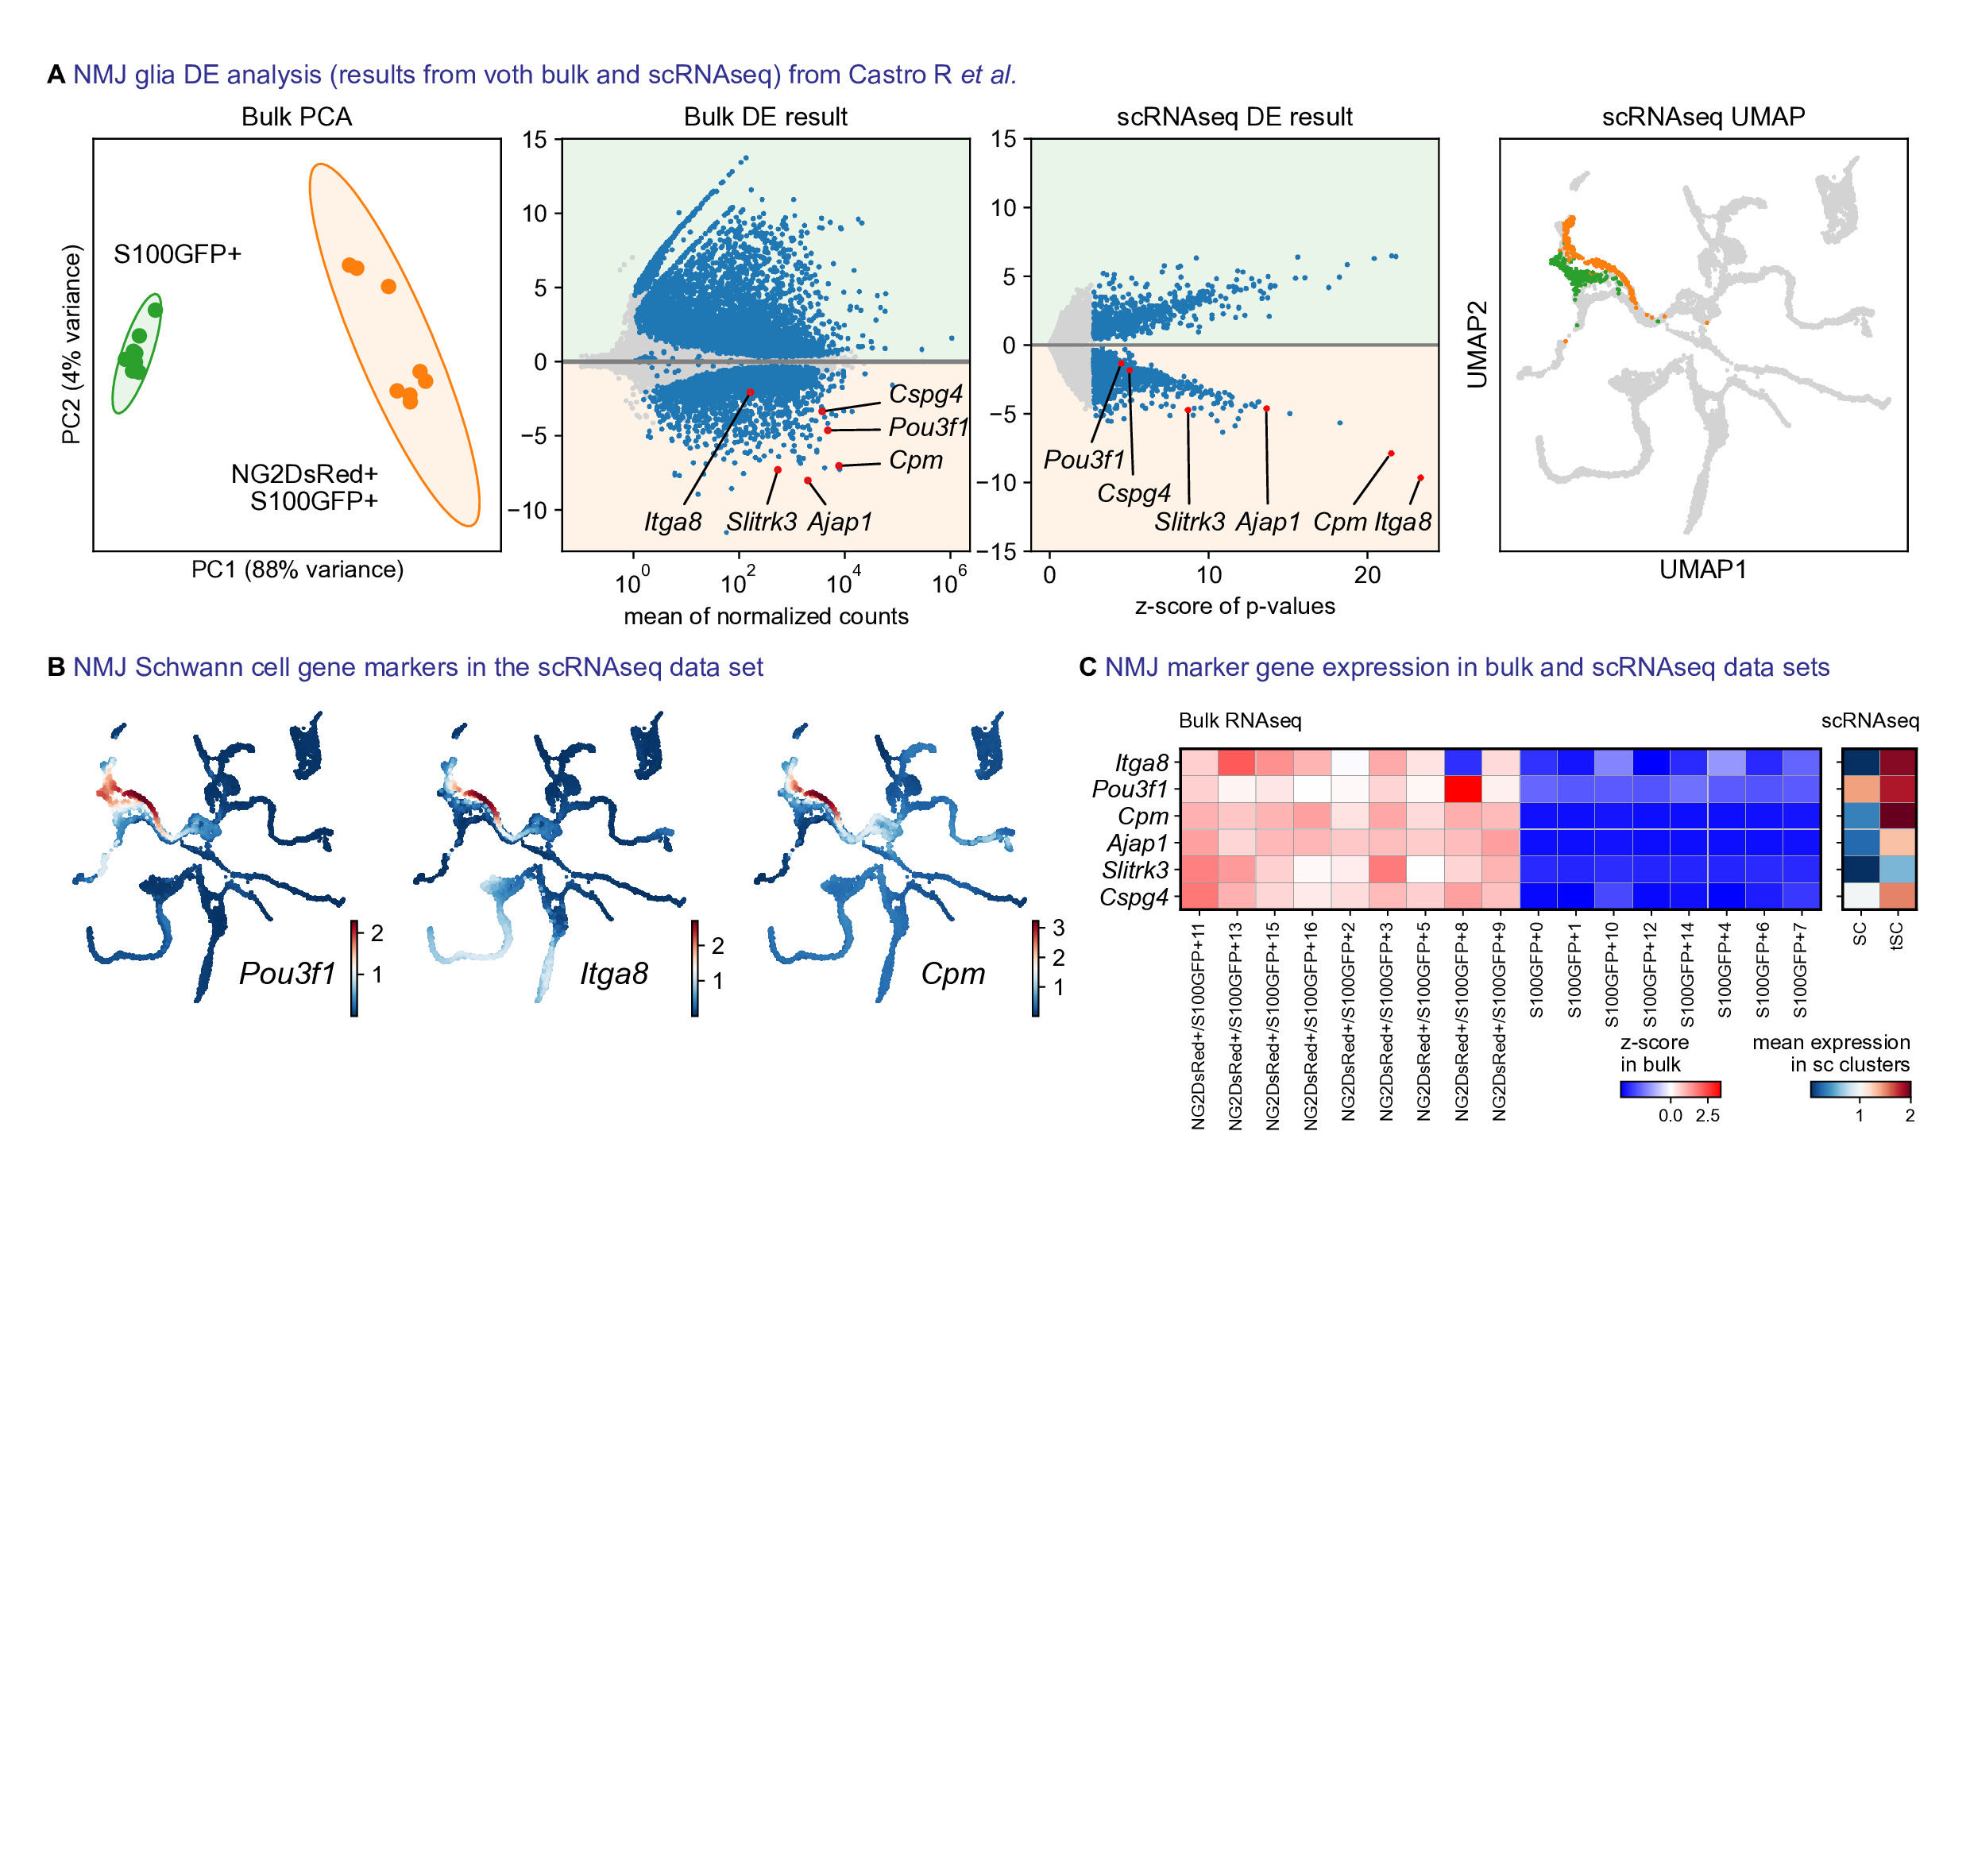

In [37]:
from IPython.display import Image
Image(filename=fname+'.jpg') 